In [3]:
This lecture is based on "DAT4 Course". https://github.com/justmarkham/DAT4

SyntaxError: invalid syntax (<ipython-input-3-f69ba17f1cce>, line 1)

## Simple Linear Regression

Simple linear regression is an approach for predicting a **quantitative response** using a **single feature** (or "predictor" or "input variable"). It takes the following form:

$y = \beta_0 + \beta_1x$

What does each term represent?
- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x

Together, $\beta_0$ and $\beta_1$ are called the **model coefficients**. To create your model, you must "learn" the values of these coefficients. And once we've learned these coefficients, we can use the model to predict smth!

## Estimating ("Learning") Model Coefficients

Generally speaking, coefficients are estimated using the **least squares criterion**, which means we are find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors"):

<img src="08_estimating_coefficients.png">

What elements are present in the diagram?
- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the distances between the observed values and the least squares line.

How do the model coefficients relate to the least squares line?
- $\beta_0$ is the **intercept** (the value of $y$ when $x$=0)
- $\beta_1$ is the **slope** (the change in $y$ divided by change in $x$)

Here is a graphical depiction of those calculations:

<img src="08_slope_intercept.png">

In [7]:
import numpy as np
import random as r
%matplotlib inline
import matplotlib.pyplot as plt
r.seed(0)
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Generate random dataset.

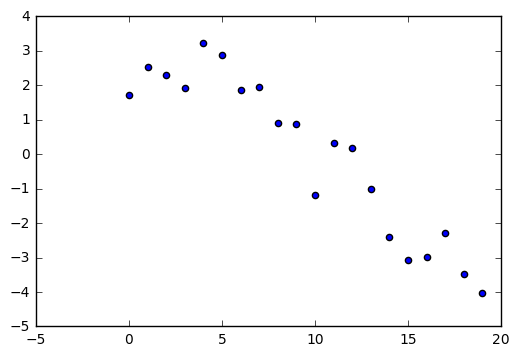

In [26]:
num_data_points = 20

y = np.random.randn(num_data_points, 1)
# y = np.random.normal(loc=0.0, scale=0.1, size=(num_data_points, 1))

y = np.cumsum(y).reshape(num_data_points, 1)
x = np.arange(num_data_points, dtype='float32').reshape(num_data_points, 1)

plt.scatter(x, y)
plt.show()

We can easily fit polynomial data without any changes to the algorithm. This is called polynomial regression.

In [34]:
def standardize(x):
    return (x - np.mean(x, axis=0)) / np.std(x, axis=0)

Now let's implement gradient descent algorithm.

0.4505631066311552 0.660245378622389
0.9962578393535727 0.9169412179474561
0.7933250841302242 0.0823729881966474
0.6127831050407122 0.4864442019691668
0.6301473404114728 0.8450775756715152
0.24303562206185625 0.7314892207908478
0.11713429320851798 0.22046053686782852
0.7945829717105759 0.33253614921965546
0.8159130965336595 0.1006075202160962
0.14635848891230385 0.6976706401912388
0.04523406786561235 0.5738660367891669
0.9100160146990397 0.534197968260724
0.6805891325622565 0.026696794662205203
0.6349999099114583 0.6063384177542189
0.5759529480315407 0.3912094093228269
0.3701399403351875 0.9805166506472687
0.036392037611485795 0.021636509855024078
0.9610312802396112 0.18497194139743833
0.12389516442443171 0.21057650988664645
0.8007465903541809 0.9369691586445807
0.022782575668658378 0.42561883196681716
0.10150021937416975 0.259919889792832
0.22082927131631735 0.6469257198353225
0.3502939673965323 0.18031790152968785
0.5036365052098872 0.03937870708469238
0.10092124118896661 0.988235148

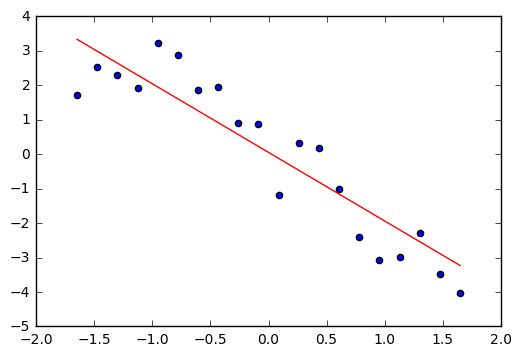

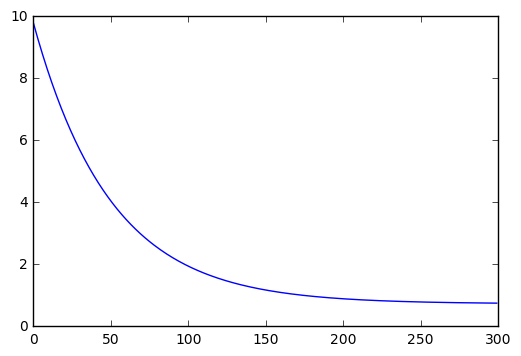

In [114]:
import math
def simplelearn(x,y):
    # Initialize coefficients with random values
    b0, b1 = r.random(), r.random()

    cost_function_values = []

    batch_size = 5

    #mean_x = sum(xs) / len(xs)
    #std_dev = math.sqrt(sum([(x - mean_x)**2 for x in xs]) / len(xs))
    #xs = [(x - mean_x) / std_dev for x in xs]
    # print(mean_x, std_dev)

    x = standardize(x)
    #print(b0, b1)
    num_batches = int(num_data_points / batch_size)
    #print(num_batches)
    for e in range(300):
        epoch_losses = []
        nn = 0
        for i in range(0, num_data_points, batch_size):
            error0, error1 = 0, 0
            batch_squared_error = 0
            num_processed_in_batch = 0
            for b in range(batch_size):
                if i + b == num_data_points:
                    break

                num_processed_in_batch += 1
                pred = b0 + b1 * x[i + b]
                error = pred - y[i + b]
                batch_squared_error += error ** 2

                error0 += error
                error1 += error * x[i + b]

            b0 = b0 - 0.01 * error0 / num_processed_in_batch
            b1 = b1 - 0.01 * error1 / num_processed_in_batch
            if num_processed_in_batch:
                epoch_losses.append(batch_squared_error / num_processed_in_batch)

        if epoch_losses:
            cost_function_values.append(sum(epoch_losses) / len(epoch_losses))

    #print(b0, b1)

    pred = []
    for el in x:
        pred.append(b0 + b1 * el)
    return pred,cost_function_values
%timeit pred,cost_function_values=simplelearn(x,y)

mse = mean_squared_error(y, pred)
print('MSE:', mse)
print(cost_function_values[-1])
plt.scatter(x, y)
plt.plot(x, pred, color='red')
plt.show()

plt.plot(cost_function_values)
plt.show()

10 loops, best of 3: 11.7 ms per loop
MSE: 0.751601626724


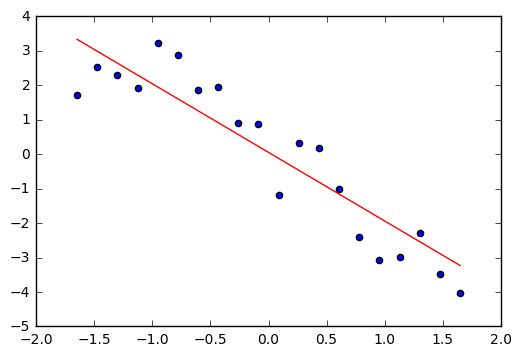

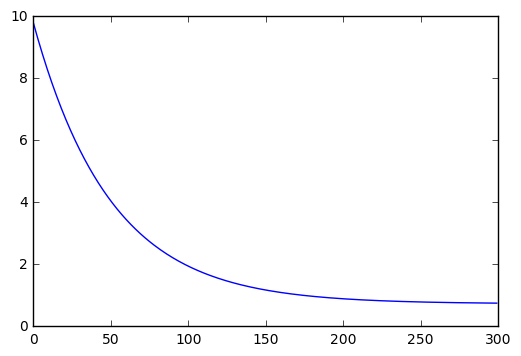

In [115]:
import numpy as np
import random as r
%matplotlib inline
import matplotlib.pyplot as plt
r.seed(0)
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def standardize(x):
    return (x - np.mean(x, axis=0)) / np.std(x, axis=0)
#feat - features, targ-targets
def numpylearn(feat,targ):
    # Initialize coefficients with random values
    b0, b1 = r.random(), r.random()
    #print(b0, b1)
    cost_function_values = []

    feat = standardize(feat)
    # Initialize prediction and error as arrays of the same size as x
    pred=np.zeros_like(feat)
    error=np.zeros_like(feat)
    error0=np.zeros_like(feat)
    error1=np.zeros_like(feat)
    squared_error=np.zeros_like(feat)
    #print(y.shape,pred.shape,error.shape)

    for e in range(300):

        epoch_losses = []
        nn = 0

        pred = b0 + b1 * feat
        #print(y.shape,pred.shape,error.shape)
        error = pred - targ
        #print(error)
        #kvadrat=np.full(error.shape, 2, dtype=np.int)
        squared_error = np.square(error)

        error0 = np.sum(error)
        #print('err0',error0)
        xt=np.transpose(feat)
        error1 = np.dot(xt,error)
        #print('err1',error1)

        b0 = b0 - 0.01 * error0 / num_data_points
        b1 = b1 - 0.01 * error1 / num_data_points
        if num_data_points:
            epoch_losses.append(np.sum(squared_error) / num_data_points)

        if epoch_losses:
            cost_function_values.append(sum(epoch_losses) / len(epoch_losses))
    return pred, cost_function_values

%timeit pred,cost_function_values= numpylearn(x,y)

mse = mean_squared_error(y, pred)
print('MSE:', mse)
plt.scatter(x, y)
plt.plot(x, pred, color='red')
plt.show()

plt.plot(cost_function_values)
plt.show()

